<a href="https://colab.research.google.com/github/Sabarikirishwaran/GSE/blob/main/GSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.9 MB/s eta 0:00:00


In [ ]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 52.7 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=15a3652d26bb6870e4c49f5bee317e91344c79f9a1934e653426953a3a429c31
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


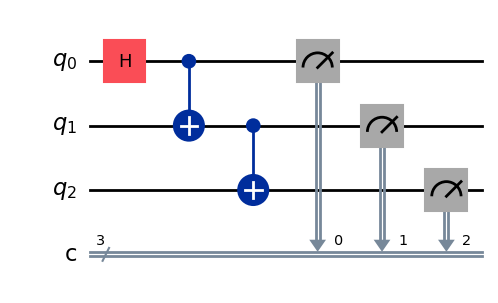

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, noise
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.quantum_info import Statevector

# Number of qubits: 3 for GHZ state
shots = 1000

# Create a Quantum Circuit with 3 system qubits for GHZ
qc = QuantumCircuit(3, 3)

# Step 1: Prepare the GHZ state
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)

# Introduce noise (same noise model as in GSE circuit)
noise_model = noise.NoiseModel()

# Define single-qubit depolarizing error
single_qubit_error = noise.depolarizing_error(0.01, 1)
# Define two-qubit depolarizing error
two_qubit_error = noise.depolarizing_error(0.02, 2)

# Add errors to the noise model
noise_model.add_all_qubit_quantum_error(single_qubit_error, ['h'])
noise_model.add_all_qubit_quantum_error(two_qubit_error, ['cx'])

# Step 2: Measure all qubits in the computational basis
qc.measure([0, 1, 2], [0, 1, 2])

qc.draw(output='mpl')

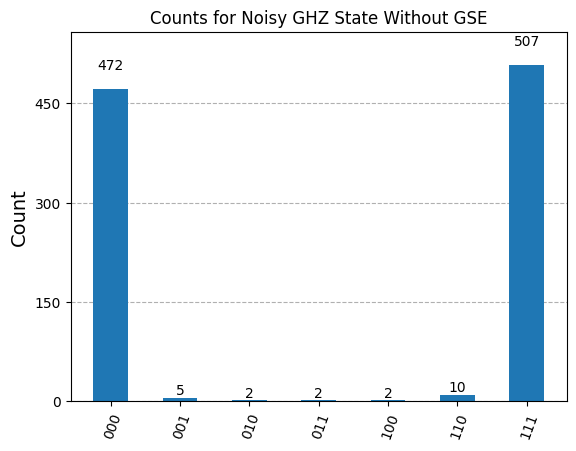

In [ ]:

# Transpile and execute the circuit
simulator = AerSimulator(noise_model=noise_model)
qc_transpiled = transpile(qc, simulator)
result = simulator.run(qc_transpiled, shots=shots).result()

# Get the counts and display the results
counts = result.get_counts()
plot_histogram(counts, title="Counts for Noisy GHZ State Without GSE")

# # Optional: Visualize the state
# state = Statevector(qc)
# plot_state_city(state.data, title="Statevector of Noisy GHZ State Without GSE")

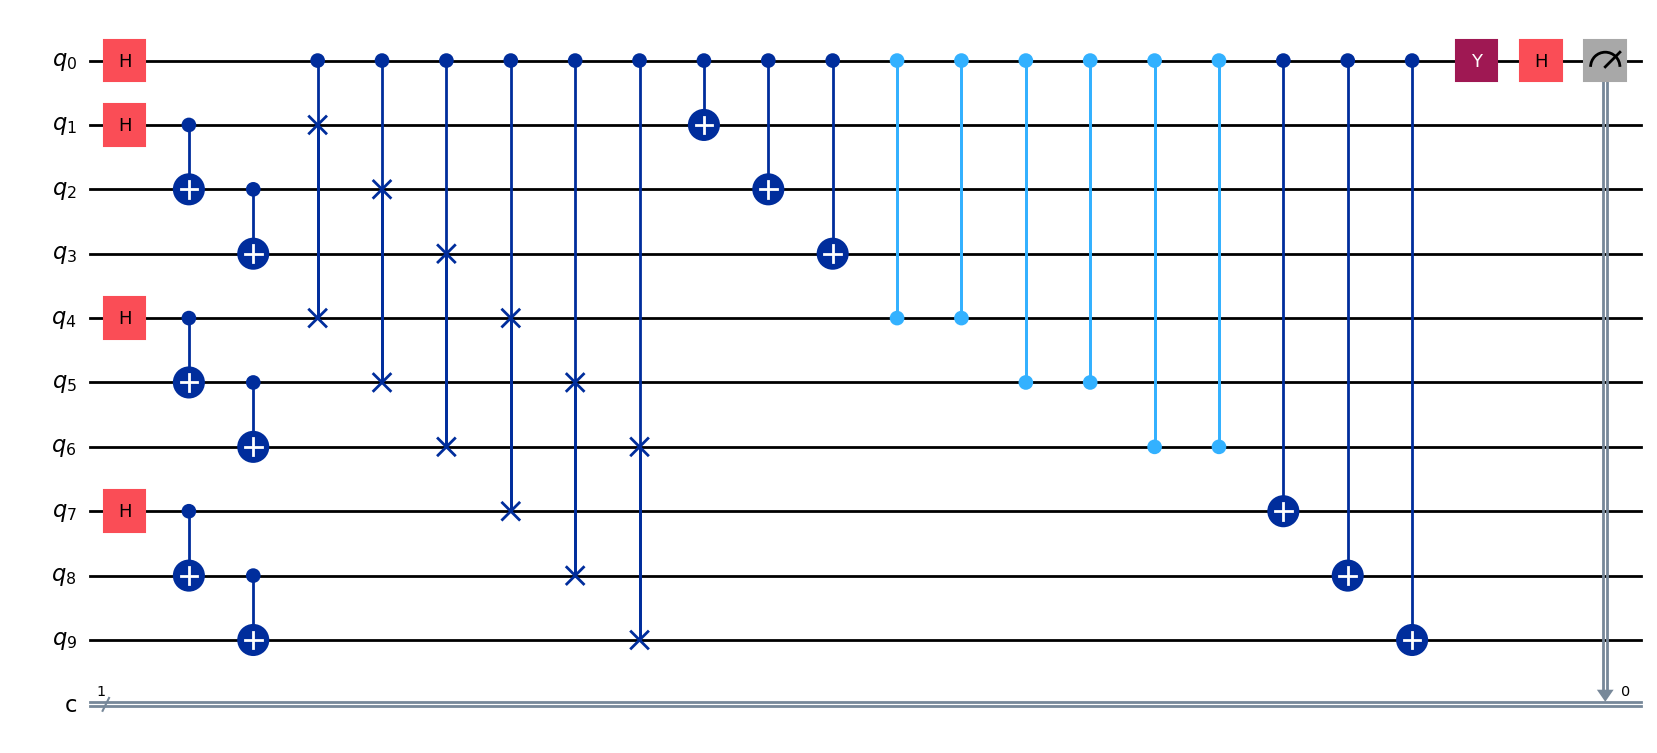

In [ ]:
#overlap matrix
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, noise
from qiskit.visualization import plot_histogram, circuit_drawer
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from qiskit.circuit.library import SwapGate

# Set the matplotlib backend to inline for Colab
%matplotlib inline

# Number of qubits: 1 ancilla + 3 system qubits (GHZ) + 3 system qubits for copies
shots = 1000

# Create a Quantum Circuit with 1 ancilla + 3 system qubits for GHZ + 3 system qubits for copies
qc = QuantumCircuit(10, 1)

# Step 1: Prepare the GHZ state
qc.h(1)
qc.cx(1, 2)
qc.cx(2, 3)

# Create copies of the GHZ state
qc.h(4)
qc.cx(4, 5)
qc.cx(5, 6)

# Create copies of the GHZ state
qc.h(7)
qc.cx(7, 8)
qc.cx(8, 9)

# Introduce noise (corrected implementation)
noise_model = noise.NoiseModel()

# Define single-qubit depolarizing error
single_qubit_error = noise.depolarizing_error(0.01, 1)
# Define two-qubit depolarizing error
two_qubit_error = noise.depolarizing_error(0.01, 2)

# Add errors to the noise model
noise_model.add_all_qubit_quantum_error(single_qubit_error, ['h'])
noise_model.add_all_qubit_quantum_error(two_qubit_error, ['cx'])

# Step 2: Prepare the ancilla qubit
qc.h(0)

# Step 4: Implement derangement using swap operators
qc.append(SwapGate().control(1),[0,1,4])
qc.append(SwapGate().control(1),[0,2,5])
qc.append(SwapGate().control(1),[0,3,6])
qc.append(SwapGate().control(1),[0,4,7])
qc.append(SwapGate().control(1),[0,5,8])
qc.append(SwapGate().control(1),[0,6,9])

# Step 3: Apply different Pauli operators (example: U1 = X, V1 = Z)
# Apply to first copy
qc.cx(0, 1)  # Controlled-X on the first copy
qc.cx(0, 2)
qc.cx(0, 3)

# Apply to second copy
qc.cz(0, 4)  # Controlled-Z on the fifth qubit
qc.cz(0, 4)  # Controlled-Z on the second qubit
qc.cz(0, 5)  # Controlled-Z on the fifth qubit
qc.cz(0, 5)  # Controlled-Z on the second qubit
qc.cz(0, 6)  # Controlled-Z on the fifth qubit
qc.cz(0, 6)  # Controlled-Z on the second qubit
#qc.cx(0, 4)  # Controlled-X on the second copy


qc.cx(0, 7)  # Controlled-X on the first copy
qc.cx(0, 8)
qc.cx(0, 9)


# Step 5: Apply Pauli operator Pa on the ancilla qubit (e.g., Pa = X)
#qc.y(0)  # Example: Applying Pauli-X operator as Pa

# Step 6: Measure in the X basis (for real part)
qc.h(0)
qc_vec = qc.copy()
qc.measure(0, 0)

# qc.sdg(0)
# qc.h(0)

# qc.measure(0, 1)
# Draw the circuit
qc.draw(output="mpl")

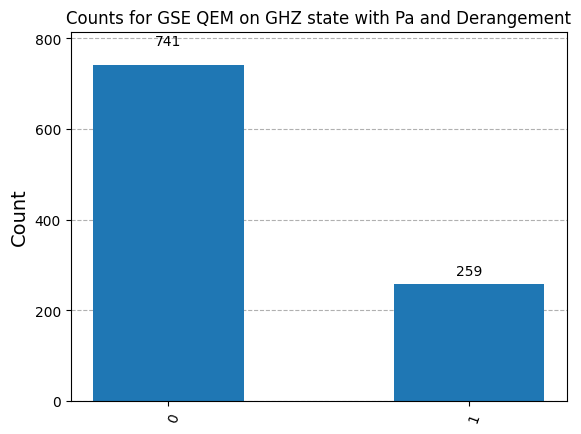

In [ ]:
# Transpile and execute
simulator = AerSimulator(noise_model=noise_model)
qc_transpiled = transpile(qc, simulator)
result = simulator.run(qc_transpiled, shots=shots).result()

counts = result.get_counts()
plot_histogram(counts, title="Counts for GSE QEM on GHZ state with Pa and Derangement")

# # Optional: Visualize the state
# state = Statevector(qc_vec)
# print(state)
#plot_state_city(state.data, title="Statevector of GHZ after GSE QEM with Pa and Derangement")


In [ ]:
#Hamiltonian matrix
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, noise
from qiskit.visualization import plot_histogram, circuit_drawer
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
from qiskit.circuit.library import SwapGate

# Set the matplotlib backend to inline for Colab
%matplotlib inline

# Number of qubits: 1 ancilla + 3 system qubits (GHZ) + 3 system qubits for copies
shots = 1000

# Create a Quantum Circuit with 1 ancilla + 3 system qubits for GHZ + 3 system qubits for copies
qc = QuantumCircuit(10, 1)

# Step 1: Prepare the GHZ state
qc.h(1)
qc.cx(1, 2)
qc.cx(2, 3)

# Create copies of the GHZ state
qc.h(4)
qc.cx(4, 5)
qc.cx(5, 6)

# Create copies of the GHZ state
qc.h(7)
qc.cx(7, 8)
qc.cx(8, 9)

# Introduce noise (corrected implementation)
noise_model = noise.NoiseModel()

# Define single-qubit depolarizing error
single_qubit_error = noise.depolarizing_error(0.01, 1)
# Define two-qubit depolarizing error
two_qubit_error = noise.depolarizing_error(0.01, 2)

# Add errors to the noise model
noise_model.add_all_qubit_quantum_error(single_qubit_error, ['h'])
noise_model.add_all_qubit_quantum_error(two_qubit_error, ['cx'])

# Step 2: Prepare the ancilla qubit
qc.h(0)

# Step 4: Implement derangement using swap operators
qc.append(SwapGate().control(1),[0,1,4])
qc.append(SwapGate().control(1),[0,2,5])
qc.append(SwapGate().control(1),[0,3,6])
qc.append(SwapGate().control(1),[0,4,7])
qc.append(SwapGate().control(1),[0,5,8])
qc.append(SwapGate().control(1),[0,6,9])

# Step 3: Apply different Pauli operators (example: U1 = X, V1 = Z)
# Apply to first copy
qc.cy(0, 1)  # Controlled-X on the first copy
qc.cy(0, 2)
qc.cy(0, 3)

# Apply to second copy
qc.cz(0, 4)  # Controlled-Z on the fifth qubit
qc.cx(0, 4)  # Controlled-Z on the fifth qubit
qc.cz(0, 4)  # Controlled-Z on the second qubit
qc.cz(0, 5)  # Controlled-Z on the fifth qubit
qc.cx(0, 5)  # Controlled-Z on the fifth qubit
qc.cz(0, 5)  # Controlled-Z on the second qubit
qc.cz(0, 6)  # Controlled-Z on the fifth qubit
qc.cx(0, 6)  # Controlled-Z on the fifth qubit
qc.cz(0, 6)  # Controlled-Z on the second qubit
#qc.cx(0, 4)  # Controlled-X on the second copy


qc.cx(0, 7)  # Controlled-X on the first copy
qc.cx(0, 8)
qc.cx(0, 9)


# Step 5: Apply Pauli operator Pa on the ancilla qubit (e.g., Pa = X)
#qc.y(0)  # Example: Applying Pauli-X operator as Pa

# Step 6: Measure in the X basis (for real part)
qc.h(0)
qc_vec = qc.copy()
qc.measure(0, 0)

# qc.sdg(0)
# qc.h(0)

# qc.measure(0, 1)
# Draw the circuit
qc.draw(output="mpl")

ModuleNotFoundError: No module named 'qiskit'

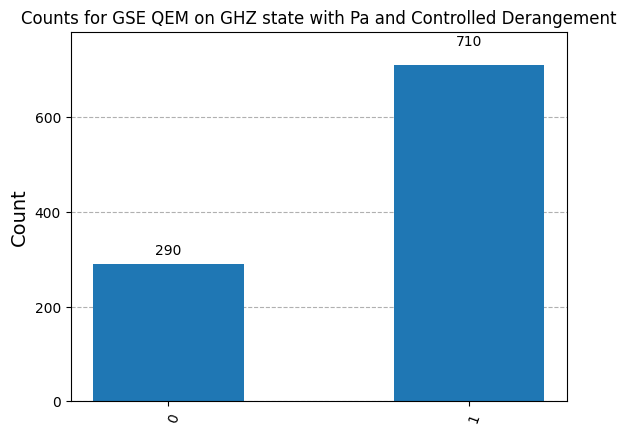

In [ ]:
# Transpile and execute
simulator = AerSimulator(noise_model=noise_model)
qc_transpiled = transpile(qc, simulator)
result = simulator.run(qc_transpiled, shots=shots).result()

# Get the counts and display the results
counts = result.get_counts()
plot_histogram(counts, title="Counts for GSE QEM on GHZ state with Pa and Controlled Derangement")

In [ ]:
state = Statevector(qc_vec)
print(state)

Statevector([ 0.25+0.j,  0.25+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
              0.  +0.j,  0.25+0.j,  0.25+0.j,  0.  +0.j,  0.  +0.j,
              0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
              0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
              0.25+0.j, -0.25+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
              0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
             -0.25+0.j,  0.25+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
              0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
              0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
              0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
              0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
              0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
              0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
              0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,
              0.  +0.j,  0.  +0.j,  0.  +0.j,  0

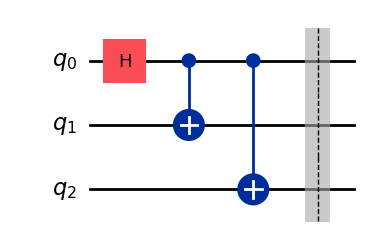

In [ ]:
#ESD demo
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, noise
from qiskit.visualization import plot_histogram, circuit_drawer
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

# Step 1: Define the noise model
noise_model = noise.NoiseModel()

# Define errors
prob_1 = 0.01  # 1% chance of error on single-qubit gates
prob_2 = 0.02  # 2% chance of error on two-qubit gates

# Depolarizing error on single qubit gates
error_1 = noise.depolarizing_error(prob_1, 1)

# Depolarizing error on two qubit gates
error_2 = noise.depolarizing_error(prob_2, 2)

# Thermal relaxation error
thermal_error = noise.thermal_relaxation_error(50, 100, 0.03)

# Add errors to the noise model
noise_model.add_all_qubit_quantum_error(error_1, ['h', 'x', 'y', 'z'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])
noise_model.add_all_qubit_quantum_error(thermal_error, ['h'])

# Step 2: Create a quantum circuit for the GHZ state
n = 3  # Number of qubits

ghz_circuit = QuantumCircuit(n)
ghz_circuit.h(0)  # Apply Hadamard gate to the first qubit

# Apply CNOT gates to entangle the qubits
for i in range(1, n):
    ghz_circuit.cx(0, i)

# Add a barrier for visualization purposes
ghz_circuit.barrier()
ghz_circuit.draw(output='mpl')


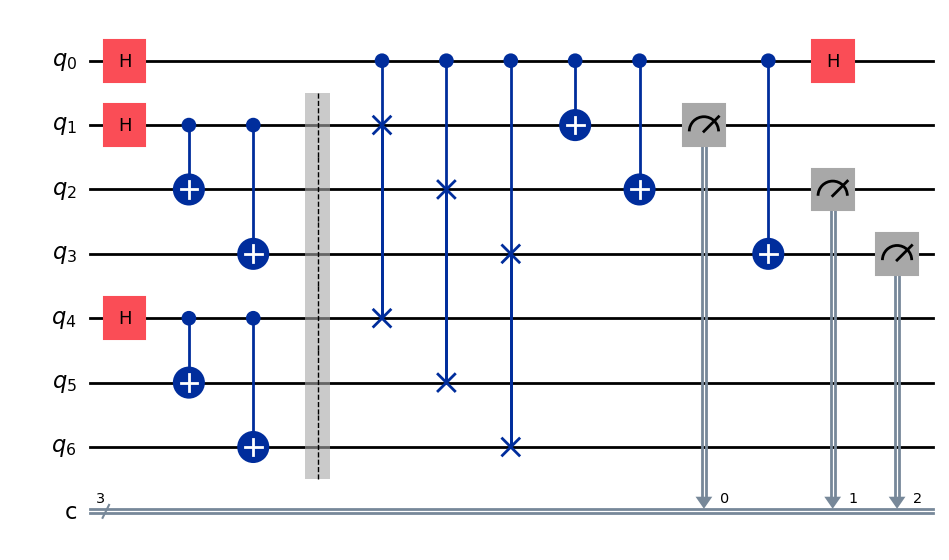

In [ ]:
# Assuming ghz_circuit and n are predefined
copies = 2  # Number of copies
ghz_circuits = []

# Step 4: Create multiple copies of the noisy GHZ state for ESD
for _ in range(copies):
    ghz_copy = ghz_circuit.copy()
    ghz_circuits.append(ghz_copy)

# Create a deranged circuit by applying swap operations between the copies
deranged_circuit = QuantumCircuit(n * copies + 1, 3)  # +1 for the ancilla qubit
ancilla_index = 0  # Using q0 as the ancilla qubit

# Apply a Hadamard gate to the ancilla qubit
deranged_circuit.h(ancilla_index)

# Apply the GHZ state preparation to each copy
for i in range(copies):
    deranged_circuit.compose(ghz_circuits[i], qubits=range(1 + i * n, 1 + (i + 1) * n), inplace=True)

# Step 5: Add an ancilla qubit and apply controlled swap operations
for i in range(copies - 1):
    for j in range(n):
        deranged_circuit.cswap(ancilla_index, j + 1, j + 1 + (i + 1) * n)

# Add controlled CNOT gates from the ancilla to q1, q2, and q3 (i.e X1 X2 X3 which is pauli decomposition of Hamiltonian of GHZ)
for i in range(1, 4):
    deranged_circuit.cx(ancilla_index, i)

# Add H to ancilla before measuring (this is equivalent of measuring using pauli-X)
deranged_circuit.h(ancilla_index)

# Measure the ancilla qubit
#deranged_circuit.measure(ancilla_index, 0)
deranged_circuit.measure(1, 0)
deranged_circuit.measure(2, 1)
deranged_circuit.measure(3, 2)

# Visualize the circuit
deranged_circuit.draw(output='mpl')


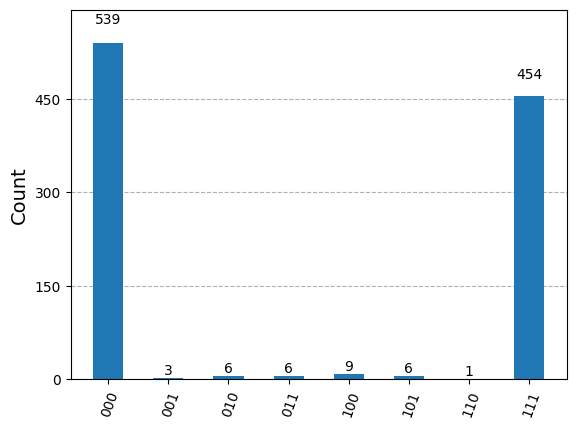

In [ ]:
#Step 6: Simulate the deranged circuit with noise
simulator = AerSimulator(noise_model=noise_model)
result_deranged = simulator.run(deranged_circuit).result()
counts = result_deranged.get_counts()
# Plot the measurement results
plot_histogram(counts)

In [ ]:
print(counts)

{'1': 76, '0': 948}
